# PyTorch

### Первое занятие: Введение в PyTorch

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:12:52_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.1, V10.1.243


In [2]:
import sys
import numpy as np
import torch
import torchvision

In [3]:
from torch import nn 
from torch import optim

* nn - формирование вычислительных графов для слоев нейронных сетей. (в TensorFlow: Keras)
* optim - алгоритмы оптимизации (SGD, Adam и т.д.). (в TensorFlow: модуль optimizers)
* Dataset – представление входных и выходных данных в разных форматах: TensorDataset, IterableDataset)
* DataLoader преобразует Dataset в формат, с помощью которого можно контролировать размера пакета (batch size), перемешивать данные, распределять процессы и т.д. В TensorFlow за это отвечает модуль data.

In [4]:
print("Python : %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

Python : 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Pytorch: 1.6.0


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


#### Загрузка существующего датасета:

In [6]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [7]:
train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)
image, label = train_dataset[0]
print(image.size())
print(label)

torch.Size([3, 32, 32])
6


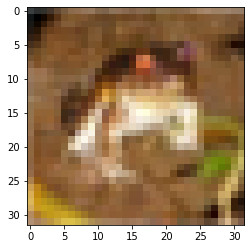

In [8]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [10]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                         shuffle=False)

Files already downloaded and verified


In [11]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Определим следующую модель:

In [12]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

In [13]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(),lr=0.001)
optimizer = optim.Adamax(net.parameters(), lr=0.001)
#optimizer = optim.AdamW(net.parameters())

In [14]:
for epoch in range(30):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.316
[1,   601] loss: 0.284
[2,     1] loss: 0.001
[2,   301] loss: 0.254
[2,   601] loss: 0.243
[3,     1] loss: 0.001
[3,   301] loss: 0.233
[3,   601] loss: 0.229
[4,     1] loss: 0.001
[4,   301] loss: 0.223
[4,   601] loss: 0.220
[5,     1] loss: 0.001
[5,   301] loss: 0.213
[5,   601] loss: 0.215
[6,     1] loss: 0.001
[6,   301] loss: 0.208
[6,   601] loss: 0.209
[7,     1] loss: 0.001
[7,   301] loss: 0.203
[7,   601] loss: 0.203
[8,     1] loss: 0.001
[8,   301] loss: 0.199
[8,   601] loss: 0.195
[9,     1] loss: 0.001
[9,   301] loss: 0.194
[9,   601] loss: 0.193
[10,     1] loss: 0.001
[10,   301] loss: 0.188
[10,   601] loss: 0.189
[11,     1] loss: 0.001
[11,   301] loss: 0.185
[11,   601] loss: 0.183
[12,     1] loss: 0.001
[12,   301] loss: 0.181
[12,   601] loss: 0.180
[13,     1] loss: 0.001
[13,   301] loss: 0.179
[13,   601] loss: 0.176
[14,     1] loss: 0.001
[14,   301] loss: 0.173
[14,   601] loss: 0.174
[15,     1] loss: 0

#### Сохранение модели

In [15]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [16]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv1.weight  \  torch.Size([6, 3, 5, 5])
conv1.bias  \  torch.Size([6])
conv2.weight  \  torch.Size([16, 6, 5, 5])
conv2.bias  \  torch.Size([16])
fc1.weight  \  torch.Size([120, 400])
fc1.bias  \  torch.Size([120])
fc2.weight  \  torch.Size([84, 120])
fc2.bias  \  torch.Size([84])
fc3.weight  \  torch.Size([10, 84])
fc3.bias  \  torch.Size([10])


#### Загрузка и использование модели 

In [17]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [18]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


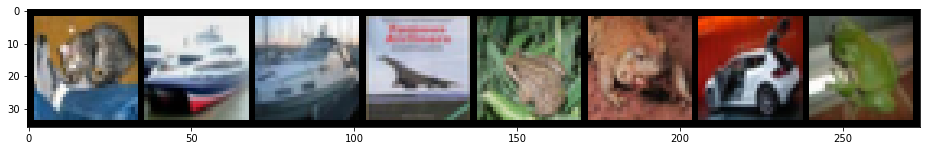

In [19]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)

plt.rcParams['figure.figsize'] = [16, 4]
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [20]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

Predicted:    dog  ship  ship plane  frog  frog   car  frog


In [21]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)